In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Loading**

In [2]:
df = pd.read_csv('diamonds.csv')
print(df.head(5))

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


# Data Inspection

In [3]:
df.info()
# price ->. target int
# carat -> weight of diamond
# color
# clarity -> how the diamond is clear object
# cut -> quality of cut (good ,     fair ... ., Premium) object
# depth
# table


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53947 entries, 0 to 53946
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53947 non-null  int64  
 1   carat       53947 non-null  float64
 2   cut         53944 non-null  object 
 3   color       53946 non-null  object 
 4   clarity     53947 non-null  object 
 5   depth       53946 non-null  float64
 6   table       53947 non-null  float64
 7   price       53947 non-null  int64  
 8   x           53947 non-null  float64
 9   y           53947 non-null  float64
 10  z           53947 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 4.5+ MB


In [4]:
df.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53947.000000,53947.000000,53944,53946,53947,53946.000000,53947.000000,53947.000000,53947.000000,53947.000000,53947
unique,NaN,NaN,8,8,11,NaN,NaN,NaN,NaN,NaN,377
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,2.7
freq,NaN,NaN,21549,11293,13064,NaN,NaN,NaN,NaN,NaN,767
mean,26973.000000,0.797936,NaN,NaN,NaN,61.749271,57.457143,3932.614158,5.731181,5.734549,NaN
std,15573.301823,0.473981,NaN,NaN,NaN,1.432571,2.234418,3989.233934,1.121691,1.142063,NaN
min,0.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,-200.000000,0.000000,0.000000,NaN
25%,13486.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,NaN
50%,26973.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,NaN
75%,40459.500000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.000000,6.540000,6.540000,NaN


# Data Cleaning

In [5]:
df.isna().sum()
# no null values

Unnamed: 0    0
carat         0
cut           3
color         1
clarity       0
depth         1
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
df.drop(['Unnamed: 0'] , axis=1, inplace=True)

In [8]:
# check duplicates :
# delete Duplicates
# df = df.drop_duplicates()

print(df.duplicated().sum())


0


In [9]:
df = df[df['price'] > 0]

In [20]:
df['clarity'].value_counts()

clarity
SI1     13030
VS2     12227
SI2      9150
VS1      8155
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

In [18]:
df[df['clarity'] == '7y']

,carat,cut,color,clarity,depth,table,price,x,y,z


In [19]:
# drop values
# df.drop(index=1092 , inplace=True)
# df.drop(index=68 , inplace=True)


In [15]:
df['color'].value_counts()

color
G    11262
E     9774
F     9518
H     8272
D     6755
I     5407
J     2801
Name: count, dtype: int64

In [157]:

# df.drop(index=619 , inplace=True)


## Drop Redundent Columns

In [21]:
df = df.drop(columns=['x', 'y', 'z'])


In [22]:
df

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,0.72,Good,D,SI1,63.1,55.0,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,0.86,Premium,H,SI2,61.0,58.0,2757


Handle Captial

In [23]:
# All uppercase
df['cut'] = df['cut'].str.lower()

# Visualization

## 1-D

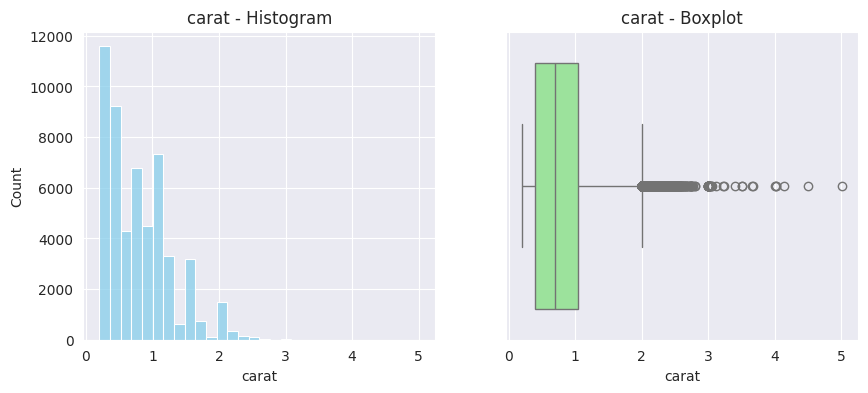

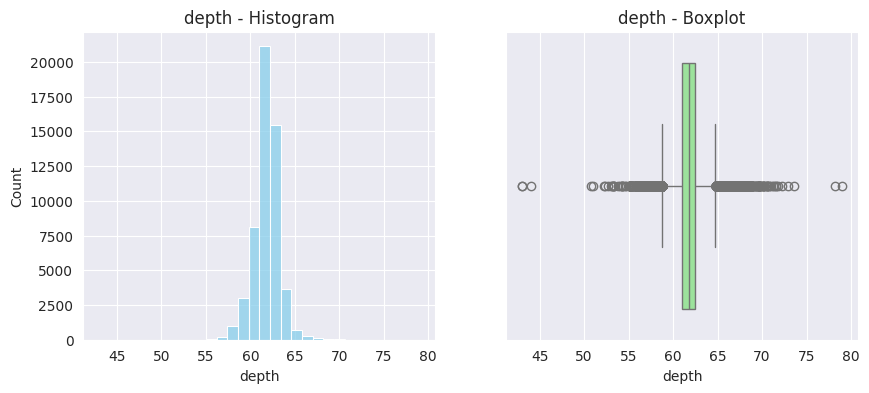

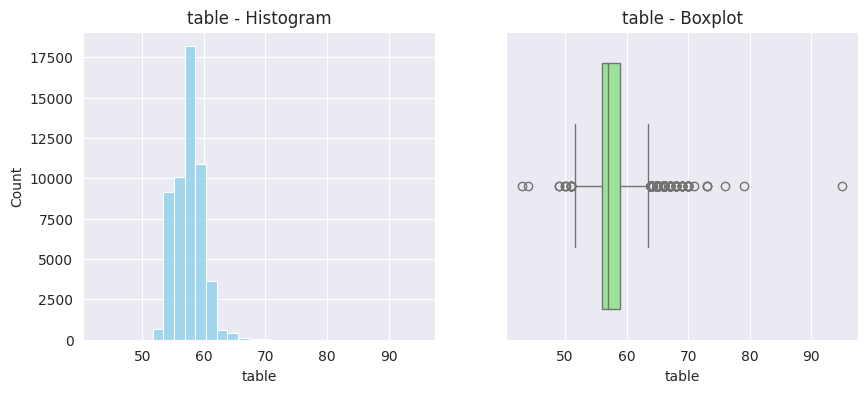

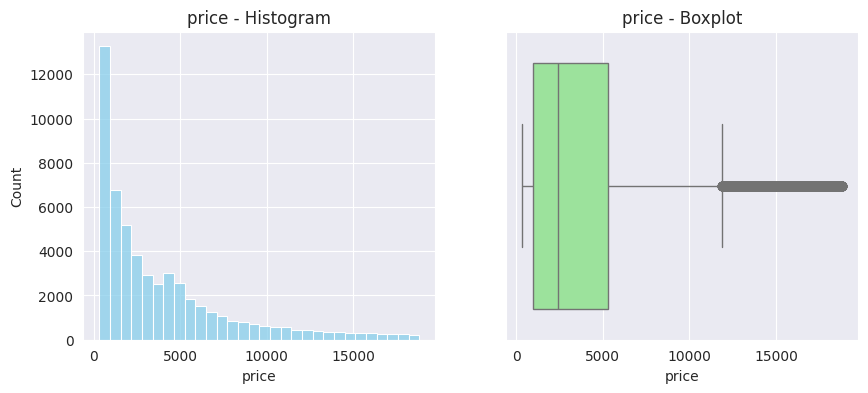

In [24]:
# for numerical : histogram , boxplot
numeric_cols = df.select_dtypes(['float64','int64']).columns


for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=df,x=col,ax=axes[0], color='skyblue', bins=30)
    axes[0].set_title(f'{col} - Histogram')
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'{col} - Boxplot')
    plt.show()


insights

Most of diamonds in range of 5000 dollars and 0 to 2 carat

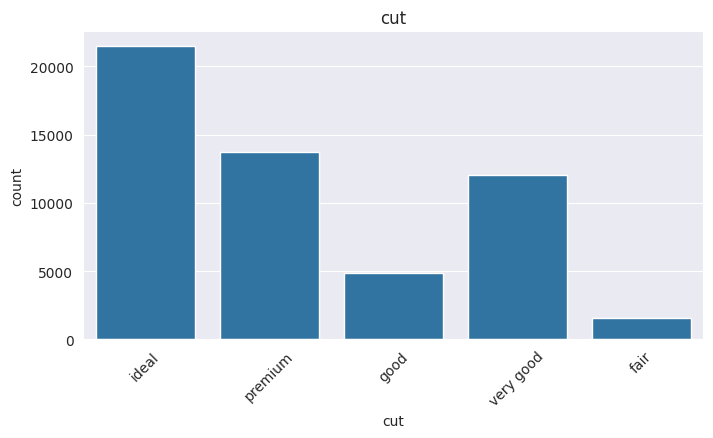

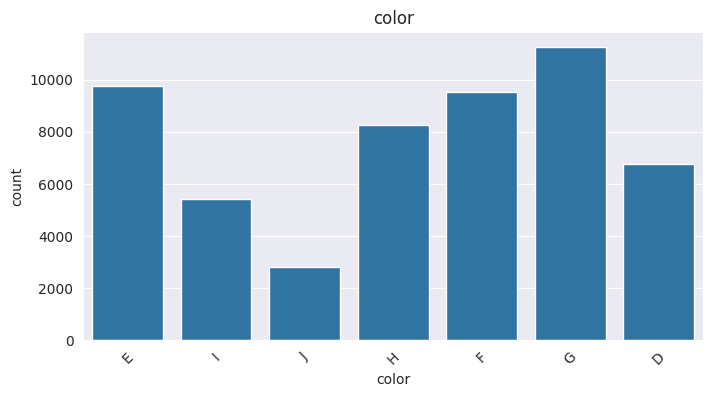

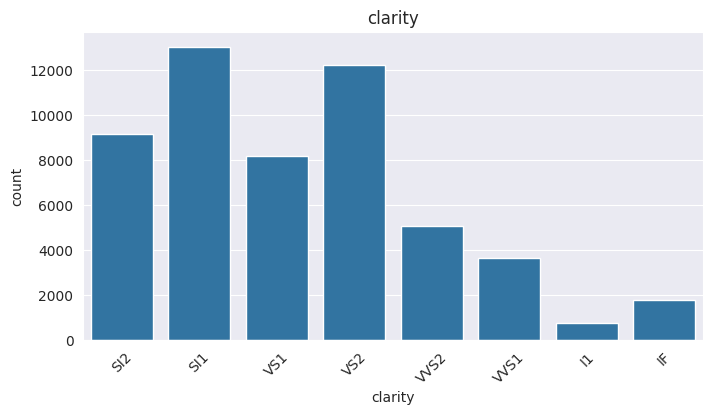

In [25]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'{col}')
    plt.show()

## 2-D

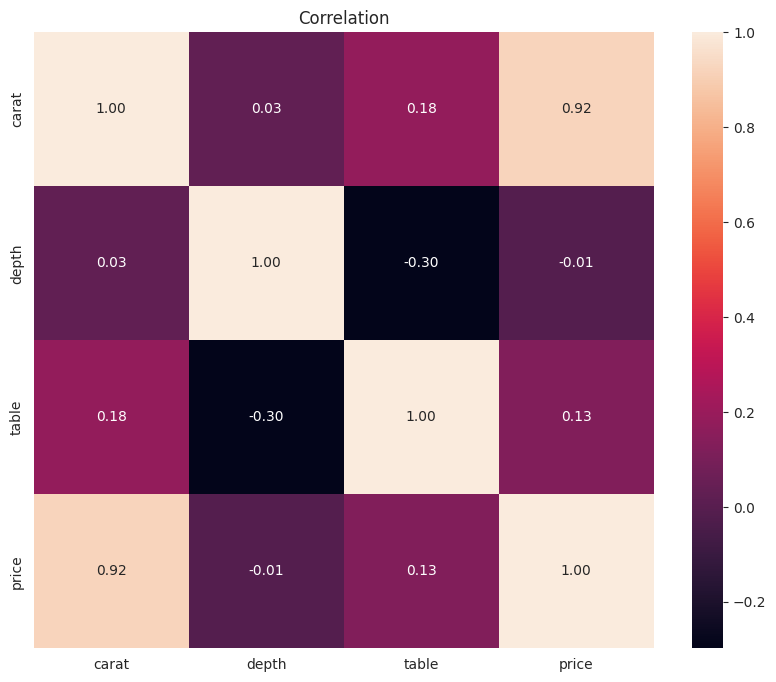

In [26]:
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation")
plt.show()

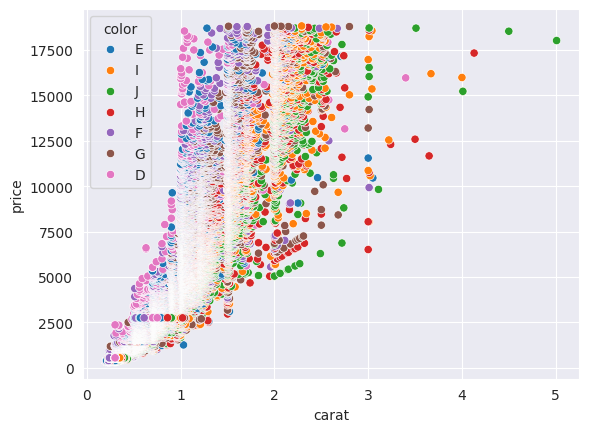

In [27]:
sns.scatterplot(data=df, x='carat', y='price',hue='color')
plt.show()

## 3-D

Text(0.5, 0, 'table')

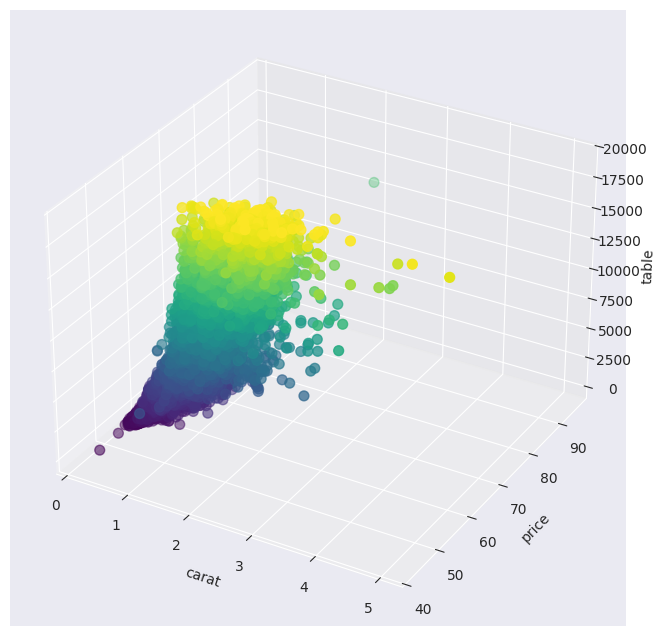

In [28]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot: X=carat, Y=table, Z=price
ax.scatter(df['carat'], df['table'], df['price'],
           c=df['price'], cmap='viridis', s=50)

# Labels
ax.set_xlabel('carat')
ax.set_ylabel('price')
ax.set_zlabel('table')


# Encoding


## Label Encoding -> ordinal (ordered data)

What it does:
Converts each category into a number (integer) by assigning an ID to each unique value.

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
df['Color_Label'] = le.fit_transform(df['color'])

In [31]:
df

,carat,cut,color,clarity,depth,table,price,Color_Label
0,0.23,ideal,E,SI2,61.5,55.0,326,1
1,0.21,premium,E,SI1,59.8,61.0,326,1
2,0.23,good,E,VS1,56.9,65.0,327,1
3,0.29,premium,I,VS2,62.4,58.0,334,5
4,0.31,good,J,SI2,63.3,58.0,335,6
...,...,...,...,...,...,...,...,...
53935,0.72,ideal,D,SI1,60.8,57.0,2757,0
53936,0.72,good,D,SI1,63.1,55.0,2757,0
53937,0.70,very good,D,SI1,62.8,60.0,2757,0
53938,0.86,premium,H,SI2,61.0,58.0,2757,4


## One-Hot Encoding ->Nominal (not ordered)

Creates a new column for each category and puts 1 or 0 to indicate presence.

In [32]:
df_encoded = pd.get_dummies(df, columns=['color'])

In [33]:
print(df_encoded)

       carat        cut clarity  depth  table  price  Color_Label  color_D  \
0       0.23      ideal     SI2   61.5   55.0    326            1    False   
1       0.21    premium     SI1   59.8   61.0    326            1    False   
2       0.23       good     VS1   56.9   65.0    327            1    False   
3       0.29    premium     VS2   62.4   58.0    334            5    False   
4       0.31       good     SI2   63.3   58.0    335            6    False   
...      ...        ...     ...    ...    ...    ...          ...      ...   
53935   0.72      ideal     SI1   60.8   57.0   2757            0     True   
53936   0.72       good     SI1   63.1   55.0   2757            0     True   
53937   0.70  very good     SI1   62.8   60.0   2757            0     True   
53938   0.86    premium     SI2   61.0   58.0   2757            4    False   
53939   0.75      ideal     SI2   62.2   55.0   2757            0     True   

       color_E  color_F  color_G  color_H  color_I  color_J  
0

# Scaling

## why scaling ?
### Many ML algorithms (like linear regression, kNN, SVM, neural networks) work better when numeric features are on a similar scale.
### Scaling also helps when:

### Features have very different ranges (e.g., age in years vs. income in thousands)

### Data has outliers or skewness


## **Prices and carat in my data is skewed , so we use : Power Transform**

## **table is standard distro : we use StandardScaler**


In [34]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')

df['price'] = scaler.fit_transform(df[['price']])

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['table'] = scaler.fit_transform(df[['table']])


In [36]:
df

,carat,cut,color,clarity,depth,table,price,Color_Label
0,0.23,ideal,E,SI2,61.5,-1.100464,-2.078214,1
1,0.21,premium,E,SI1,59.8,1.585694,-2.078214,1
2,0.23,good,E,VS1,56.9,3.376467,-2.074766,1
3,0.29,premium,I,VS2,62.4,0.242615,-2.050940,5
4,0.31,good,J,SI2,63.3,0.242615,-2.047580,6
...,...,...,...,...,...,...,...,...
53935,0.72,ideal,D,SI1,60.8,-0.205078,0.166146,0
53936,0.72,good,D,SI1,63.1,-1.100464,0.166146,0
53937,0.70,very good,D,SI1,62.8,1.138001,0.166146,0
53938,0.86,premium,H,SI2,61.0,0.242615,0.166146,4
